In [1]:
from Helpers import *

In [2]:
def f(x):
    C = np.array([-x[3]*(2*x[2]+x[3])*a2*np.sin(x[1]),x[2]*x[2]*a2*np.sin(x[1])])
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    omega = Minv@(-Bdyn@x[2:4]-C)
    return np.array([x[2],x[3],omega[0],omega[1]])
def g(x):
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    G = np.zeros((4,2))
    G[2:,] = Minv
    return G
def A(x,w):return np.array([[w,0,1,0],[0,w,0,1]])
def e(x,v,w):
    return A(x,w)@x+v

def fe(x,w):
    return A(x,w)@f(x)

def ge(x,w):return A(x,w)@g(x)
def Geinv(x,w):return np.linalg.inv(ge(x,w))
def u(edot,x,w):
    return (Geinv(x,w)@(edot-fe(x,w)))   



In [3]:
def ToCartesian(x):
    if len(x.shape) == 1 : 
        s = x[0]
        e = x[1]
    else : 
        s = x[:,0]
        e = x[:,1]
    X = np.cos(s+e)*33+np.cos(s)*30
    Y = np.sin(s+e)*33+np.sin(s)*30

    return X,Y

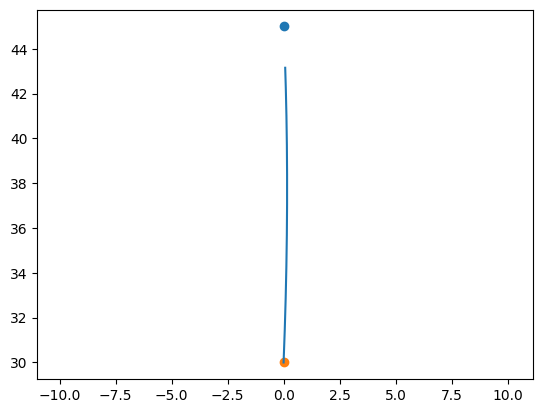

In [4]:
K = 2000
dt = .001
starting_point = [0,30]
targets = [0,45]
obj1,obj2 = newton(newtonf,newtondf,1e-8,1000,targets[0],targets[1]) #Defini les targets
st1,st2 = newton(newtonf,newtondf,1e-8,1000,starting_point[0],starting_point[1])

x = np.array([st1,st2,0.0,0.0])
w = 100
v = -np.array([obj1,obj2])*w
array_x = np.zeros((K,4))
array_x[0] = np.copy(x)
for i in range(K-1):
    edot = -e(x,v,w)#/np.linalg.norm(e(x,v,w),ord = 2)
    
    x += dt*(f(x)+(g(x)@u(edot,x,w)).reshape(4))
    array_x[i+1] = x
    #print(e(x,v,w))
X,Y = ToCartesian(array_x)
plt.plot(X,Y)
X,Y = ToCartesian(-v/w)
plt.scatter(X,Y)
X,Y = ToCartesian(np.array([st1,st2]))
plt.scatter(X,Y)
plt.axis("equal")
plt.show()

In [44]:
def RandomV(maxv1 = 3*pi/4,maxv2 = 3*pi/4):
    return np.array([np.random.uniform(0,maxv1),np.random.uniform(0,maxv2)])

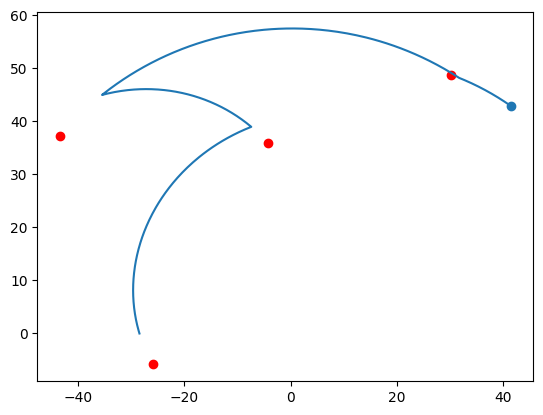

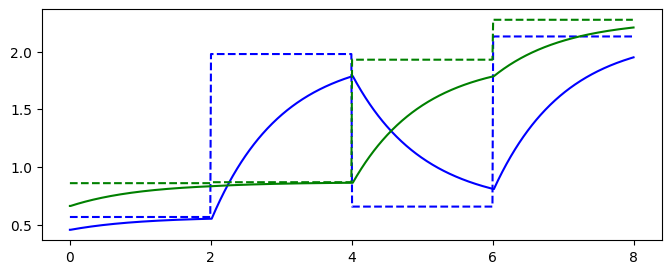

In [6]:
dt = .01
Tmax = 8
T = np.linspace(0,Tmax,int(Tmax/dt))

K = len(T)

st1,st2 = RandomV()
x = np.array([st1,st2,0.0,0.0])
w = 100

array_x = np.zeros((K,4))
array_V = np.zeros((K-1,2))
array_x[0] = np.copy(x)

for i in range(K-1):
    if i%(2/dt) == 0 : 
        v = RandomV()
        X,Y = ToCartesian(v)
        plt.scatter(X,Y,color = "red")

    edot = -e(x,v*-w,w)#/np.linalg.norm(e(x,v*-w,w),ord = 2)
    
    x += dt*(f(x)+(g(x)@u(edot,x,w)).reshape(4))
    array_x[i+1] = x
    array_V[i] = v
    
X,Y = ToCartesian(array_x)
plt.plot(X,Y)

X,Y = ToCartesian(np.array([st1,st2]))
plt.scatter(X,Y)
plt.axis("equal")
plt.show()

plt.figure(figsize = (8,3))
plt.xticks(np.linspace(0,Tmax,int(Tmax/2)+1))
COLORV = ["blue","green"]
COLORX = ["black","grey"]
for i in range(2):
    plt.plot(T[:-1],array_V[:,i],color = COLORV[i],linestyle = "--")
    plt.plot(T,array_x[:,i],color = COLORV[i])




In [8]:
def Arrow(x,y,index = 300):
    arrow_x, arrow_y = x[index], y[index]
    dx = (x[index + 10] - x[index])
    dy = y[index + 10] - y[index]
    tot = np.sqrt(dx*dx+dy*dy)
    dx/=tot
    dy/=tot
    plt.quiver(arrow_x, arrow_y, dx*2, 2*dy, angles='xy', scale_units='xy', scale=1, color='blue', width=0.01)


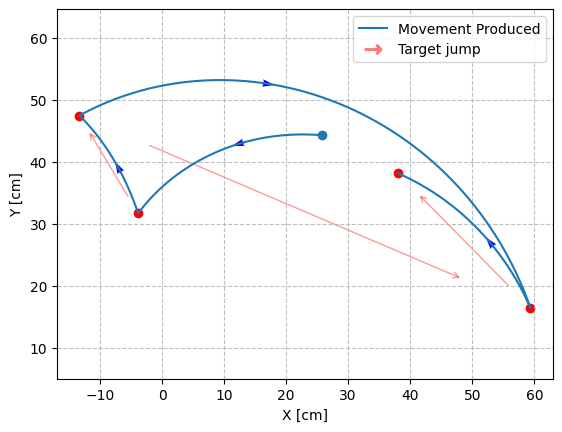

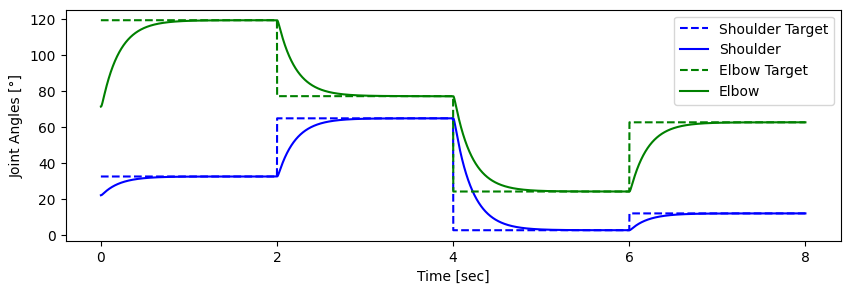

In [50]:

from matplotlib.lines import Line2D
import matplotlib as mpl
from matplotlib.patches import FancyArrowPatch
fig,ax = plt.subplots()
dt = .001
Tmax = 8
T = np.linspace(0,Tmax,int(Tmax/dt))

K = len(T)

st1,st2 = RandomV()
x = np.array([st1,st2,0.0,0.0])
w = 100

array_x = np.zeros((K,4))
array_V = np.zeros((K-1,2))
array_x[0] = np.copy(x)

for i in range(K-1):
    if i%(2/dt) == 0 : 
        if i != 0: oldv = v 
        v = RandomV(maxv1= pi/2)
        X2,Y2 = ToCartesian(v)
        plt.scatter(X2,Y2,color = "red")
        if i != 0:
            X,Y = ToCartesian(oldv)
            Dx,Dy = X2-X,Y2-Y
            xplot = np.linspace(X+.15*Dx,X+.85*Dx,1)
            yplot = np.linspace(Y+.15*Dy,Y+.85*Dy,1)
            #ax.add_line(Line2D(xdata=xplot,ydata=yplot, color = "red",alpha = .4, marker=r'$\rightarrow$',markersize  =12))
            arr = mpl.patches.ArrowStyle.CurveB(head_length=.4, head_width=.2)
            arrow = FancyArrowPatch((X+.15*Dx,Y+.15*Dy), (X+.85*Dx,Y+.85*Dy),
                        arrowstyle=arr, color='red', mutation_scale=10,alpha = .4)
            ax.add_patch(arrow)
            

    edot = -(e(x,v*-w,w)*5)#/(np.linalg.norm(e(x,v*-w,w),ord = 2))
    
    x += dt*(f(x)+(g(x)@u(edot,x,w)).reshape(4))
    array_x[i+1] = x
    array_V[i] = v
    
X,Y = ToCartesian(array_x)
ax.plot(X,Y,label= "Movement Produced")
for i in range(int(Tmax/2)):

    Arrow(X,Y,index = int(i*2/dt)+int(.1/dt))

X,Y = ToCartesian(np.array([st1,st2]))
ax.scatter(X,Y)
ax.axis("equal")
arrow = u'$\u2192$'
rotated_marker = mpl.markers.MarkerStyle(marker=arrow)
arrow_handle = Line2D([0], [0], color='red', marker=rotated_marker, markersize=12, label='Target jump', linestyle='None',alpha = .4)


# Add the custom legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(arrow_handle)
labels.append('Target jump')
ax.legend(handles=handles, labels=labels)
plt.grid(alpha = .8,linestyle = "--")
plt.ylabel("Y [cm]")
plt.xlabel("X [cm]")
plt.show()

plt.figure(figsize = (10,3))
plt.xticks(np.linspace(0,Tmax,int(Tmax/2)+1))
COLORV = ["blue","green"]
COLORX = ["black","grey"]
LABELS = ["Shoulder","Elbow"]
for i in range(2):
    plt.plot(T[:-1],array_V[:,i]/(2*pi)*360,color = COLORV[i],linestyle = "--",label = LABELS[i]+" Target")
    plt.plot(T,array_x[:,i]/(2*pi)*360,color = COLORV[i],label = LABELS[i])
    plt.ylabel("Joint Angles [°]")
    plt.xlabel("Time [sec]")
    plt.legend()



In [146]:
def f(x):
    C = np.array([-x[3]*(2*x[2]+x[3])*a2*np.sin(x[1]),x[2]*x[2]*a2*np.sin(x[1])])
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    omega = Minv@(x[4:6]-Bdyn@x[2:4]-C)
    tau = -x[4:6]/.06
    return np.array([x[2],x[3],omega[0],omega[1],tau[0],tau[1]])
def g(x):
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    G = np.zeros((6,2))
    G[4:,] = np.identity(2)/.06
    return G

def RandomV(maxv1 = 3*pi/4,maxv2 = 3*pi/4):
    return np.array([0,0,np.random.uniform(0,maxv1),np.random.uniform(0,maxv2)])
def Geinv(x,w):return np.linalg.pinv(ge(x,w))

def A(x,w):
    r = 1
    return np.array([[w,0,1,0,0,0],[0,w,0,1,0,0],[0,0,0,0,r,0],[0,0,0,0,0,r]])

In [229]:
def Simulate(Q,Tmax = 8,dt = .001,we = 10):
    fig,ax = plt.subplots(figsize = (8,8))
    dt = .001
    Tmax = 8
    T = np.linspace(0,Tmax,int(Tmax/dt))

    K = len(T)

    st1,st2,_,_ = RandomV()
    x = np.array([st1,st2,0.0,0.0,0.0,0.0])
    w = 100

    array_x = np.zeros((K,6))
    array_V = np.zeros((K-1,4))
    array_x[0] = np.copy(x)



    for i in range(K-1):
        if i%(2/dt) == 0 : 
            if i != 0: oldv = v 
            v = RandomV(maxv1= pi/2)
            X2,Y2 = ToCartesian(v[2:])
            plt.scatter(X2,Y2,color = "red")
            if i != 0:
                X,Y = ToCartesian(oldv[2:])
                Dx,Dy = X2-X,Y2-Y
                xplot = np.linspace(X+.15*Dx,X+.85*Dx,1)
                yplot = np.linspace(Y+.15*Dy,Y+.85*Dy,1)
                #ax.add_line(Line2D(xdata=xplot,ydata=yplot, color = "red",alpha = .4, marker=r'$\rightarrow$',markersize  =12))
                arr = mpl.patches.ArrowStyle.CurveB(head_length=.4, head_width=.2)
                arrow = FancyArrowPatch((X+.15*Dx,Y+.15*Dy), (X+.85*Dx,Y+.85*Dy),
                            arrowstyle=arr, color='red', mutation_scale=10,alpha = .4)
                ax.add_patch(arrow)
                

        edot = -Q@(e(x,v*-w,w))#/(np.linalg.norm(e(x,v*-w,w),ord = 2))
        
        x += dt*(f(x)+(g(x)@u(edot,x,w)).reshape(6))
        array_x[i+1] = x
        array_V[i] = v
        
    X,Y = ToCartesian(array_x)
    ax.plot(X,Y,label= "Movement Produced")
    for i in range(int(Tmax/2)):

        Arrow(X,Y,index = int(i*2/dt)+int(.1/dt))

    X,Y = ToCartesian(np.array([st1,st2]))
    ax.scatter(X,Y)
    ax.axis("equal")
    arrow = u'$\u2192$'
    rotated_marker = mpl.markers.MarkerStyle(marker=arrow)
    arrow_handle = Line2D([0], [0], color='red', marker=rotated_marker, markersize=12, label='Target jump', linestyle='None',alpha = .4)


    # Add the custom legend
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(arrow_handle)
    labels.append('Target jump')
    ax.legend(handles=handles, labels=labels)
    plt.grid(alpha = .8,linestyle = "--")
    plt.ylabel("Y [cm]")
    plt.xlabel("X [cm]")
    plt.show()

    plt.figure(figsize = (10,3))
    plt.xticks(np.linspace(0,Tmax,int(Tmax/2)+1))
    COLORV = ["blue","green"]
    COLORX = ["black","grey"]
    LABELS = ["Shoulder","Elbow"]
    for i in range(2):
        plt.plot(T[:-1],array_V[:,i]/(2*pi)*360,color = COLORV[i],linestyle = "--",label = LABELS[i]+" Target")
        plt.plot(T,array_x[:,i]/(2*pi)*360,color = COLORV[i],label = LABELS[i])
        plt.ylabel("Joint Angles [°]")
        plt.xlabel("Time [sec]")
        plt.legend()


<Figure size 800x800 with 0 Axes>

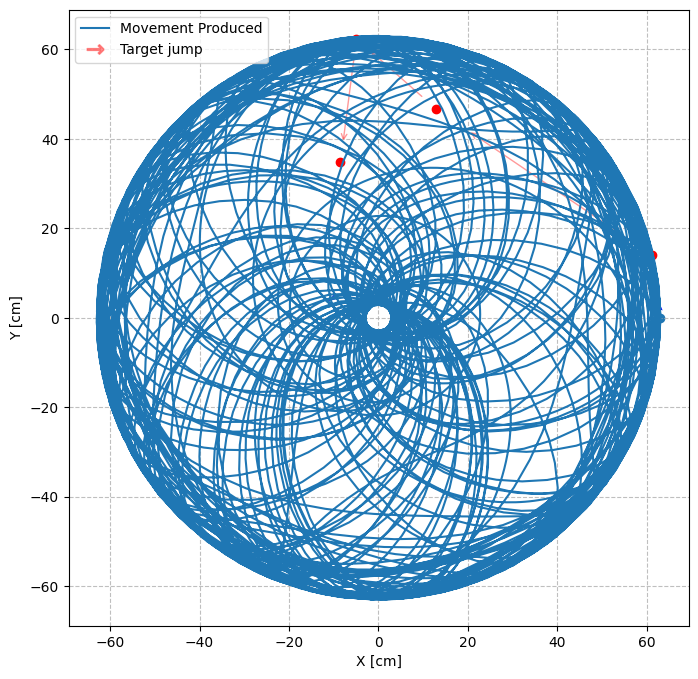

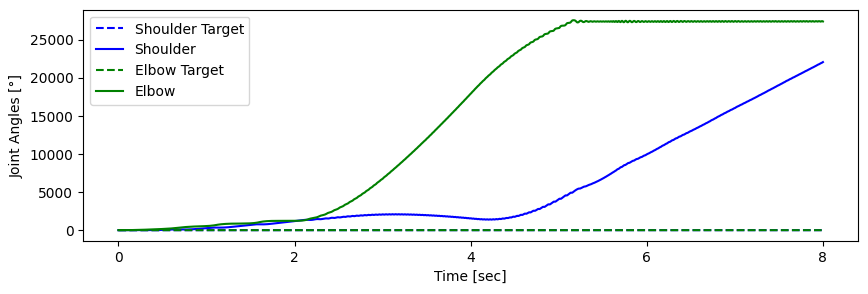

In [233]:
plt.figure(figsize = (8,8))
def A(x,w):
    r = 1
    return np.array([[w,0,1,0,0,0],[0,w,0,1,0,0],[0,0,0,0,r,0],[0,0,0,0,0,r]])

Q = np.diag([1e4,1e4,1,1])
Simulate(Q,Tmax = 8,dt = .001,we = 10)